In [1]:
import sys
import os

# Obtén la ruta absoluta de la carpeta que contiene este archivo
ruta_actual = os.getcwd()

# Construye la ruta a la carpeta que contiene 'modulo1.py'
ruta_src = os.path.join(ruta_actual, '..')

# Agrega la ruta de la carpeta a sys.path
sys.path.append(ruta_src)

In [2]:
from data_preprocess.data_preprocess import DataPreprocess
data_path = "../data/Txs_LoteriaBlacksmith.xlsx"
p1 = DataPreprocess(data_path, index_column='FechaTx', target_column = 'Cantidad')
p1.remove_irrelevant_features(del_columns=['IdCliente','NomProducto','CodProducto'])

In [3]:
array = p1.output_dataframe.groupby(by='CodSDV', sort=True)['Cantidad'].sum().sort_values(ascending=False).head(25).reset_index()['CodSDV'].unique()
array = list(array)
array[0]

109216

In [4]:
p1.filter_dataframe_by_feature(filter_column='CodSDV',filter_value=array[0])

In [5]:
p1.output_dataframe

,Genero,CodOficina,CodSDV,CodCanal,FechaTx,HoraTx,Cantidad,Ingreso
18883,F,2900145,109216,3,2022-08-16,20,2,4000
19129,F,2900145,109216,3,2022-08-17,14,1,2000
19234,F,2900145,109216,3,2022-08-18,19,1,2000
19235,F,2900145,109216,3,2022-08-18,9,1,2000
19236,F,2900145,109216,3,2022-08-18,7,1,2000
...,...,...,...,...,...,...,...,...
99732,F,2900145,109216,3,2023-07-14,19,4,18000
99733,F,2900145,109216,3,2023-07-14,7,4,17000
99734,F,2900145,109216,3,2023-07-14,21,1,2000
99735,F,2900145,109216,3,2023-07-14,13,1,3000


In [6]:
p1.grouped_dataframe_by_feature(grouped_column ='CodSDV')

In [7]:
p1.output_dataframe

,FechaTx,Cantidad
0,2022-08-16,2
1,2022-08-17,1
2,2022-08-18,4
3,2022-08-19,1
4,2022-08-26,1
...,...,...
275,2023-07-10,14
276,2023-07-11,43
277,2023-07-12,17
278,2023-07-13,31


In [8]:
p1.completed_timeserie_df()

In [9]:
p1.output_dataframe

,Cantidad
2022-08-16,2
2022-08-17,1
2022-08-18,4
2022-08-19,1
2022-08-20,0
...,...
2023-07-10,14
2023-07-11,43
2023-07-12,17
2023-07-13,31


In [10]:
p1.feature_generation()
p1.handle_missing_values()
p1.split_data(split = 7)

In [11]:
p1.output_dataframe

,Cantidad,DiaSemana,Mes,Dia,EsQuincena,EsFestivo,media_movil
index,,,,,,,
2022-08-23,0,1,8,23,False,False,1.142857
2022-08-24,0,2,8,24,False,False,0.857143
2022-08-25,0,3,8,25,False,False,0.714286
2022-08-26,1,4,8,26,False,False,0.142857
2022-08-27,0,5,8,27,False,False,0.142857
...,...,...,...,...,...,...,...
2023-07-10,14,0,7,10,False,False,49.428571
2023-07-11,43,1,7,11,False,False,41.571429
2023-07-12,17,2,7,12,False,False,41.428571


In [25]:
from train.forecaster_model import ForecasterModel

In [26]:
y = 'Cantidad'
steps = 7
sel_exog = ['Mes', 'Dia','media_movil']#, 'DiaSemana','EsQuincena', 'EsFestivo']
data_train = p1.data_train
data_test  = p1.data_test
# Lags used as predictors
lags_grid = [7, 21, 60]#[7, 14, 21, 30, 60]
metric = ['mean_absolute_error','mean_squared_error']

In [27]:
forecaster_model = ForecasterModel(steps,lags_grid,metric)

In [28]:
forecaster_model.train_model(data_train,y)

Number of models compared: 30.


lags grid: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'ridge__alpha': 0.46415888336127775}
  Backtesting metric: 23.373100473531352

Modelo ridge ha sido entrenado
Number of models compared: 144.


lags grid: 100%|██████████| 3/3 [00:29<00:00,  9.92s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'xgbregressor__colsample_bytree': 1, 'xgbregressor__gamma': 0.5, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1, 'xgbregressor__subsample': 1}
  Backtesting metric: 24.134532034397125

Modelo xgbregressor ha sido entrenado
Number of models compared: 30.


params grid:  30%|███       | 9/30 [00:50<02:18,  6.57s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  33%|███▎      | 10/30 [01:18<04:21, 13.07s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  37%|███▋      | 11/30 [01:41<05:06, 16.14s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  40%|████      | 12/30 [02:07<05:44, 19.15s/it]c:\repos\prueba-loteria-blacksmith\

`Forecaster` refitted using the best-found parameters, and the whole data set: 
  Parameters: {'order': (7, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}
  Backtesting metric: 24.965256440073198

Modelo arima ha sido entrenado


In [29]:
forecaster_model.models

{'ridge': {'model': Ridge(random_state=123),
  'hiperparameters': {'ridge__alpha': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
          3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
          1.29154967e+04, 1.00000000e+05])},
  'trained_model': ================= 
  ForecasterAutoreg 
  Regressor: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                  ('ridge', Ridge(alpha=0.46415888336127775, random_state=123))]) 
  Lags: [1 2 3 4 5 6 7] 
  Transformer for y: None 
  Transformer for exog: None 
  Window size: 7 
  Weight function included: False 
  Exogenous included: False 
  Type of exogenous variable: None 
  Exogenous variables names: None 
  Training range: [Timestamp('2022-08-23 00:00:00'), Timestamp('2023-07-07 00:00:00')] 
  Training index type: DatetimeIndex 
  Training index frequency: D 
  Regressor parameters: {'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'ridge__a

In [30]:
forecaster_model.evaluate_models(data_test)

----------------------------------------
Métricas de modelo ridge:
--mse: 546.0947588254577
--mape: 1.0200010207348107
--r2: -2.4026758879002315
----------------------------------------
Métricas de modelo xgbregressor:
--mse: 926.8005121327858
--mape: 1.1630532233028248
--r2: -4.774825164611711
----------------------------------------
Métricas de modelo arima:
--mse: 523.814290855835
--mape: 0.9965830045171875
--r2: -2.2638479465839154


In [31]:
forecaster_model.select_best_model()

print(f'winner: {forecaster_model.best_model_name}  metrics = {forecaster_model.best_model_metrics}')

winner: arima  metrics = {'mse': 523.814290855835, 'mape': 0.9965830045171875, 'r2': -2.2638479465839154}


In [32]:
forecaster_model.best_model.params

{'maxiter': 200,
 'method': 'lbfgs',
 'order': (7, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': False,
 'trend': 'n',
 'with_intercept': True}

In [33]:
# Predict
# ==============================================================================
# Predict only a subset of steps
predictions = forecaster_model.best_model.predict(steps=steps)#, exog=data_test[['DiaSemana','Mes','EsFestivo']])
display(predictions)

2023-07-08    45.176072
2023-07-09    54.474108
2023-07-10    48.460993
2023-07-11    53.026487
2023-07-12    49.590285
2023-07-13    52.207236
2023-07-14    47.027056
Freq: D, Name: pred, dtype: float64

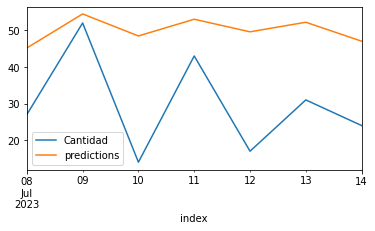

In [34]:
import matplotlib.pyplot as plt
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_test[[y]].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [35]:
window_size = forecaster_model.best_model.window_size

In [38]:
# Predict
# ==============================================================================
# Predict only a subset of steps
predictions = forecaster_model.best_model.predict(steps=steps,last_window=data_test[y])#, exog=data_test[['DiaSemana','Mes','EsFestivo']])
display(predictions)

2023-07-15    33.633835
2023-07-16    27.309533
2023-07-17    31.868713
2023-07-18    27.004265
2023-07-19    30.488650
2023-07-20    27.329953
2023-07-21    29.482496
Freq: D, Name: pred, dtype: float64

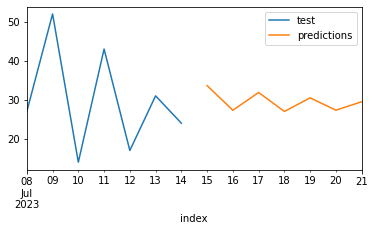

In [39]:
fig, ax = plt.subplots(figsize=(6, 3))
data_test[y].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();